In [ ]:
import random
import math
import matplotlib.pyplot as plt
import graphviz

In [ ]:
%cd /content/drive/MyDrive/Autograd from scratch
from simplegrad.node import Node

/content/drive/MyDrive/Autograd from scratch


In [ ]:
def show_graph(root):
    dot = graphviz.Digraph('Network', graph_attr={'rankdir': 'LR'})
    dot.node(name=str(id(root)), label="{ %.4f | %s | %.4f }" % (root.value, root.op, root.grad), shape='record')
    visited = set()
    def create_graph(root):

        for child in root.children:
            dot.node(name=str(id(child)), label="{ %.4f | %s | %.4f }" % (child.value, child.op, child.grad), shape='record')
            dot.edge(str(id(child)), str(id(root)))
            if child in visited:
                continue
            create_graph(child)
        visited.add(root)

    create_graph(root)
    return dot

In [ ]:
def zero_grad(root):
    def _zero_grad(_root):
        for i in _root.children:
            i.grad = 0
            _zero_grad(i)

    root.grad = 1.0
    _zero_grad(root)

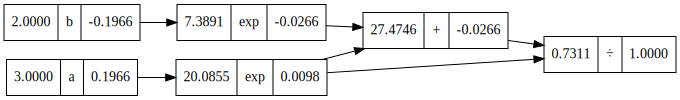

In [ ]:
ea = Node(3, op='a').exp()
eb = Node(2, op='b').exp()
z = ea / (ea + eb)

zero_grad(z)
z.backward()
show_graph(z)

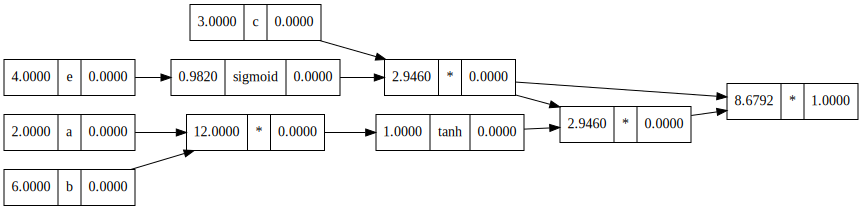

In [ ]:
a = Node(2, op='a')
b = Node(6, op='b')
c = Node(3, op='c')
e = Node(4, op='e')
d = a * b
f = c * e.sigmoid()
L = f * d.tanh() * f

zero_grad(L)
L.backward
show_graph(L)